# Basic cleaning, transormation and feature engineering were made with data
# After some descriptive statistics were made to take a look on data
# The main disadvantage of what have been done is data was not considered as a time series that is way time series techniques was not applied
# As result plotting and analysing of distributions that do not have stationarity is wrong in terms of analysing time series

# rdy_to_stats.xlsx file creates here

In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from scipy.stats import norm, kstest, shapiro, iqr

In [2]:
# this are periods when 1,2,3,4 HEs were under operation
time_periods = [
    ("2022-09-05","2022-09-09"), ("2022-09-12","2022-09-13"),
    ("2022-10-17","2022-10-21"), ("2022-11-08","2022-11-11"), ("2022-11-15","2022-11-18"),
    ("2022-11-22","2022-11-25"), ("2022-11-29","2022-12-02"), ("2022-12-05","2022-12-09"), 
    ("2022-12-12","2022-12-16"), ("2022-12-19","2022-12-23"), ("2023-01-10","2023-01-13"), 
    ("2023-01-16","2023-01-19"), ("2023-01-24","2023-01-27"), ("2023-01-31","2023-02-03"), 
    ("2023-02-07","2023-02-09"), ("2023-02-13","2023-02-17"), ("2023-02-28","2023-03-03"), 
    ("2023-03-06","2023-03-07"), ("2023-03-09","2023-03-10"), ("2023-03-14","2023-03-17"),
    ("2023-03-27","2023-03-31"), ("2023-04-03","2023-04-07"), ("2023-04-10","2023-04-14"),
]

time_periods2 = [
    ("2021-09-06","2021-09-10"), ("2021-09-13","2021-09-17"), ("2021-09-20","2021-10-01"),
    ("2021-10-04","2021-10-08"), ("2021-10-11","2021-10-15"), ("2021-11-08","2021-11-12"),
    ("2021-11-15","2021-11-19"), ("2021-11-22","2021-11-26"), ("2021-11-29","2021-12-03"),
    ("2021-12-07","2021-12-03"), ("2021-12-13","2021-12-17"), ("2021-12-20","2021-12-24"),
    ("2022-01-18","2022-01-21"), ("2022-01-24","2022-01-26"), ("2022-02-01","2022-02-04"),
    ("2022-02-08","2022-02-11"), ("2022-02-14","2022-02-18"), ("2022-02-24","2022-02-25"),
    ("2022-03-01","2022-03-04"), ("2022-03-15","2022-03-18"), ("2022-03-21","2022-03-25"),
    ("2022-03-29","2022-04-01"), ("2022-04-12","2022-04-15"), ("2022-04-18","2022-04-22"),
    ("2022-05-02","2022-05-06"), ("2022-05-09","2022-05-13"), ("2022-05-16","2022-05-20"),
    ("2022-05-23","2022-05-27"), ("2022-06-07","2022-06-10"), ("2022-06-20","2022-06-24"),
    ("2022-06-28","2022-07-01"),
    
]

time_periods3 = [
    ("2020-10-12","2020-10-16"), ("2020-10-21","2020-10-23"), ("2020-10-28","2020-10-30"),
    ("2020-11-11","2020-11-13"), ("2020-11-16","2020-11-20"), ("2020-11-24","2020-11-27"),
    ("2020-12-03","2020-12-04"), ("2020-12-07","2020-12-11"), ("2020-12-16","2020-12-18"), 
    ("2020-12-24","2020-12-25"), ("2020-12-29","2020-12-30"), ("2021-01-12","2021-01-15"),
    ("2021-01-18","2021-01-22"), ("2021-02-01","2021-02-05"), ("2021-02-08","2021-02-12"),
    ("2021-02-15","2021-02-19"), ("2021-03-01","2021-03-05"), ("2021-03-09","2021-03-12"),
    ("2021-03-15","2021-03-19"), ("2021-03-22","2021-03-26"), ("2021-04-01","2021-04-02"),
    ("2021-04-05","2021-04-09"), ("2021-04-05","2021-04-09"), ("2021-04-12","2021-04-16"),
    ("2021-04-20","2021-04-24"), ("2021-04-26","2021-04-30"), ("2021-05-03","2021-05-07"),
    ("2021-05-11","2021-05-15"), ("2021-05-17","2021-05-21"), ("2021-05-24","2021-05-28"),
    ("2021-06-15","2021-06-18"), ("2021-06-21","2021-06-25"), ("2021-06-28","2021-07-02"),
]

In [3]:
time_periods_all = [*time_periods3, *time_periods2, *time_periods]

### All IDs used
* 299 Т1к после ТО
* 309 Р2контура
* 315 T1k before HE
* 317 Т2к перед ТО
* 319 Т2к после ТО
* 321 T reactor
* 325 Т2к выхТО1
* 327 Твозвуха
* 381 Iвг1
* 395 Iвг2
* 396 Iвг3
* 460 Т2к выхТО2
* 461 Т2к выхТО3
* 462 Т2к выхТО4
* 463 Т2к выхТО5
* 480 Q1k
* 481 Q2контура
#### Second loop I pumps id
* 406 2-1
* 407 2-2
* 408 2-3
* 409 2-4

In [4]:
plt.rcParams.update({'font.size': 14})

In [5]:
sys.path.insert(0, os.path.join(os.path.split(os.path.abspath(""))[0], "app"))

In [6]:
from preprocessing import CsvRefactorer
from analytics import WaterFlowRates
from data_engineering import PeriodicDataPreprocess, FeatureEngineering

In [7]:
# key ids 317, 319, 325, 460, 461, 462, 463, 327
df_refacP1 = CsvRefactorer.read_csv("P1_second_circuit_data_050922_to_210423.csv")
df_refacP2 = CsvRefactorer.read_csv("P2_second_circuit_data_050922_to_210423.csv")

In [8]:
initial_view = df_refacP1.df.loc["2022-10-18", ][df_refacP1.df.loc["2022-10-18", "ID"] == 481]

In [9]:
df_refacP11 = CsvRefactorer.read_csv("P1_second_circuit_data_060921_to_010722.csv")
df_refacP21 = CsvRefactorer.read_csv("P2_second_circuit_data_060921_to_010722.csv")

In [10]:
df_refacP12 = CsvRefactorer.read_csv("P1_second_circuit_data_121020_to_020721.csv")
df_refacP22 = CsvRefactorer.read_csv("P2_second_circuit_data_121020_to_020721.csv")

In [116]:
ids1 = df_refacP1.df["ID"].unique()
ids2 = df_refacP2.df["ID"].unique()

ids11 = df_refacP11.df["ID"].unique()
ids21 = df_refacP21.df["ID"].unique()

ids12 = df_refacP12.df["ID"].unique()
ids22 = df_refacP22.df["ID"].unique()

In [117]:
ids1_array = df_refacP1.select_by_ids(ids1)
ids2_array = df_refacP2.select_by_ids(ids2)

ids11_array = df_refacP11.select_by_ids(ids11)
ids21_array = df_refacP21.select_by_ids(ids21)

ids12_array = df_refacP12.select_by_ids(ids12)
ids22_array = df_refacP22.select_by_ids(ids22)

In [118]:
# freq in minutes
freq = 60

group1 = df_refacP1.min_frac_groupby(freq, *ids1_array)
group2 = df_refacP2.min_frac_groupby(freq, *ids2_array)

group11 = df_refacP11.min_frac_groupby(freq, *ids11_array)
group21 = df_refacP21.min_frac_groupby(freq, *ids21_array)

group12 = df_refacP12.min_frac_groupby(freq, *ids12_array)
group22 = df_refacP22.min_frac_groupby(freq, *ids22_array)

In [119]:
df1 = df_refacP1.concat_dfs(group1)
df2 = df_refacP2.concat_dfs(group2)

df11 = df_refacP11.concat_dfs(group11)
df21 = df_refacP21.concat_dfs(group21)

df12 = df_refacP12.concat_dfs(group12)
df22 = df_refacP22.concat_dfs(group22)

In [120]:
df = pd.concat([df1, df2], axis=1)
df11 = pd.concat([df11, df21], axis=1)
df12 = pd.concat([df12, df22], axis=1)

In [121]:
df = pd.concat([df12, df11, df], axis=0)

In [122]:
df.loc["2022-09"]

299       309        315        317        319  \
Timestamp                                                                   
2022-09-05 08:00:00  18.799999  0.010000  16.299999  18.000000  18.638462   
2022-09-05 09:00:00  18.799999  0.171471  16.299999  16.190625  16.719271   
2022-09-05 10:00:00  18.799999  0.440000  16.299999  13.504787  13.675135   
2022-09-05 11:00:00  18.799999  0.440000  16.299999  13.910695  14.082888   
2022-09-05 12:00:00  17.026595  0.439500  16.579365  14.307027  14.519892   
...                        ...       ...        ...        ...        ...   
2022-09-30 19:00:00        NaN       NaN        NaN        NaN        NaN   
2022-09-30 20:00:00        NaN       NaN        NaN        NaN        NaN   
2022-09-30 21:00:00        NaN       NaN        NaN        NaN        NaN   
2022-09-30 22:00:00        NaN       NaN        NaN        NaN        NaN   
2022-09-30 23:00:00        NaN       NaN        NaN        NaN        NaN   

                           321        325        327       381       395  \
Timestamp                                                                  
2022-09-05 08:00:00  13.584616  18.600000  15.414286       NaN       NaN   
2022-09-05 09:00:00  13.803465  16.609575  17.690909  2.632189  1.425306   
2022-09-05 10:00:00  13.890425  13.551087  20.592857  1.212696  3.396580   
2022-09-05 11:00:00  13.951905  13.945699  17.475217       NaN  2.694226   
2022-09-05 12:00:00  13.664904  14.391444  17.838839  1.271482       NaN   
...                        ...        ...        ...       ...       ...   
2022-09-30 19:00:00        NaN        NaN        NaN       NaN       NaN   
2022-09-30 20:00:00        NaN        NaN        NaN       NaN       NaN   
2022-09-30 21:00:00        NaN        NaN        NaN       NaN       NaN   
2022-09-30 22:00:00        NaN        NaN        NaN       NaN       NaN   
2022-09-30 23:00:00        NaN        NaN        NaN       NaN       NaN   

                         396         481       406         407         408  \
Timestamp                                                                    
2022-09-05 08:00:00      NaN         NaN       NaN         NaN    0.266839   
2022-09-05 09:00:00      NaN  750.617978       NaN  139.401032   57.828451   
2022-09-05 10:00:00      NaN  817.866667  3.516624  143.523830  141.104204   
2022-09-05 11:00:00  2.15875  817.191667       NaN  142.625749  140.344689   
2022-09-05 12:00:00      NaN  818.670833       NaN  142.969877  140.240503   
...                      ...         ...       ...         ...         ...   
2022-09-30 19:00:00      NaN         NaN       NaN         NaN         NaN   
2022-09-30 20:00:00      NaN         NaN       NaN         NaN         NaN   
2022-09-30 21:00:00      NaN         NaN       NaN         NaN         NaN   
2022-09-30 22:00:00      NaN         NaN       NaN         NaN         NaN   
2022-09-30 23:00:00      NaN         NaN       NaN         NaN         NaN   

                            409        460        461        462        463  
Timestamp                                                                    
2022-09-05 08:00:00    0.696365  19.079319  19.261005  19.437573  19.333335  
2022-09-05 09:00:00  133.744377  16.061091  16.669290  17.026349  19.271858  
2022-09-05 10:00:00  134.386718  13.924009  14.048298  14.123549  19.254495  
2022-09-05 11:00:00  133.631173  14.327655  14.438737  14.519745  19.223411  
2022-09-05 12:00:00  133.603406  14.763315  14.888213  14.967864  19.186356  
...                         ...        ...        ...        ...        ...  
2022-09-30 19:00:00         NaN        NaN        NaN        NaN        NaN  
2022-09-30 20:00:00         NaN        NaN        NaN        NaN        NaN  
2022-09-30 21:00:00         NaN        NaN        NaN        NaN        NaN  
2022-09-30 22:00:00         NaN        NaN        NaN        NaN        NaN  
2022-09-30 23:00:00         NaN        NaN        NaN        NaN        NaN  

[616 r

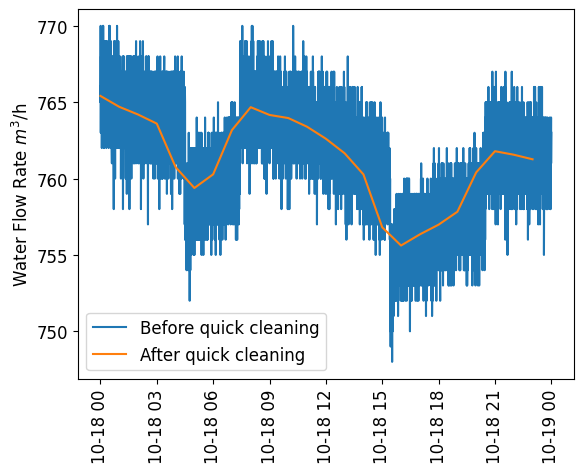

In [123]:

plt.plot(initial_view["Value"], label="Before quick cleaning")
plt.plot(df.loc["2022-10-18", 481], label="After quick cleaning")
plt.ylabel("Water Flow Rate $m^3$/h")
plt.xticks(rotation=90)
plt.legend()

In [124]:
df = df.rename(columns=df_refacP1.IDS_MAP)

In [125]:
df.loc["2020-10-22"]

T1aHE        P2      T1bHE      T2bHE      T2aHE  \
Timestamp                                                                   
2020-10-22 00:00:00  40.425789  0.400000  46.109524  26.364921  32.251562   
2020-10-22 01:00:00  40.942392  0.400055  46.525000  27.037838  32.886388   
2020-10-22 02:00:00  41.197297  0.400000  46.748128  27.438542  33.218717   
2020-10-22 03:00:00  41.780107  0.400000  47.395790  27.908021  33.742021   
2020-10-22 04:00:00  42.314516  0.400000  48.016043  28.258919  34.193478   
2020-10-22 05:00:00  42.646994  0.400000  48.354098  28.572487  34.516402   
2020-10-22 06:00:00  42.900000  0.400000  48.646196  28.711399  34.711578   
2020-10-22 07:00:00  43.126086  0.400000  48.895653  28.849489  34.875532   
2020-10-22 08:00:00  43.352689  0.400000  49.164286  29.010582  35.092391   
2020-10-22 09:00:00  43.442858  0.400000  49.304839  28.939062  35.094764   
2020-10-22 10:00:00  43.254011  0.400000  49.145213  28.671429  34.845604   
2020-10-22 11:00:00  43.222798  0.400000  49.159677  28.565054  34.768108   
2020-10-22 12:00:00  43.169231  0.400000  49.134615  28.488710  34.699448   
2020-10-22 13:00:00  43.200001  0.400000  49.162162  28.495628  34.704325   
2020-10-22 14:00:00  43.351099  0.400000  49.330108  28.591535  34.845834   
2020-10-22 15:00:00  43.450550  0.400000  49.412639  28.795789  35.006952   
2020-10-22 16:00:00  43.786339  0.400000  49.777778  29.050794  35.290811   
2020-10-22 17:00:00  43.965385  0.400000  49.951100  29.280214  35.515816   
2020-10-22 18:00:00  44.135911  0.400000  50.080435  29.401630  35.630850   
2020-10-22 19:00:00  44.051042  0.400000  50.153093  28.900000  35.315384   
2020-10-22 20:00:00  42.018408  0.400000  48.285714  26.141546  32.792683   
2020-10-22 21:00:00  40.161538  0.400000  46.451020  24.229442  30.849239   
2020-10-22 22:00:00  39.105236  0.400000  45.399474  23.193035  29.782051   
2020-10-22 23:00:00  38.441799  0.400000  44.748677  22.517703  29.096392   

                      Treactor     T2aHE1       Tair      CTF1       CTF2  \
Timestamp                                                                   
2020-10-22 00:00:00  43.593966  32.752105  11.230288  1.241996  74.668649   
2020-10-22 01:00:00  44.092704  33.363102  11.117062  0.990855  74.789077   
2020-10-22 02:00:00  44.278151  33.707065  10.731579  3.651988  75.010344   
2020-10-22 03:00:00  44.943913  34.215591   9.902956  0.934967  75.214573   
2020-10-22 04:00:00  45.618987  34.671276   9.673460  1.476966  75.161921   
2020-10-22 05:00:00  45.847258  34.994054   9.472350  0.113562  74.839855   
2020-10-22 06:00:00  46.132068  35.184324   9.721327  2.108446  74.781529   
2020-10-22 07:00:00  46.416667  35.360001   9.852913  0.578024  74.903881   
2020-10-22 08:00:00  46.611392  35.578803   8.739320  1.113137  74.652301   
2020-10-22 09:00:00  46.768936  35.574594   8.131163  1.891636  74.652502   
2020-10-22 10:00:00  46.644538  35.345355   7.649510  2.185670  75.224888   
2020-10-22 11:00:00  46.726160  35.271978   8.003883  1.136214  74.666703   
2020-10-22 12:00:00  46.782279  35.200001   9.080488  2.709655  73.923463   
2020-10-22 13:00:00  46.736596  35.207735  10.929596  1.074326  73.603577   
2020-10-22 14:00:00  46.956723  35.354144  11.172512  2.233898  73.457278   
2020-10-22 15:00:00  47.017796  35.510215  12.604762  3.450247  73.531676   
2020-10-22 16:00:00  47.498326  35.789730  14.046635  2.200928  74.230726   
2020-10-22 17:00:00  47.665546  36.013333  14.154634  1.007376  73.703412   
2020-10-22 18:00:00  47.850211  36.131720  13.616746  1.065914  73.354195   
2020-10-22 19:00:00  47.758051  35.857426  12.603828  1.351977  73.579902   
2020-10-22 20:00:00  46.086555  33.414925  10.552381  2.430338  73.786401   
2020-10-22 21:00:00  44.230126  31.508122   5.250000  1.336082  73.898291   
2020-10-22 22:00:00  43.220426  30.436316   4.645098  1.221834  73.895206   
2020-10-22 23:00:00  42.621368  29.750526   4.977895  1.057653  74.930114   

                   

In [126]:
df = df.reindex(sorted(df.columns), axis=1)

In [127]:
periods_all = df_refacP1.select_time_period(df, time_periods_all)
periods_all

{'2020-10-12 2020-10-16':                           CTF1       CTF2      CTF3        P2          Q2  \
 Timestamp                                                                   
 2020-10-12 13:00:00   2.211792   2.858656  3.951927  0.000000    1.000000   
 2020-10-12 14:00:00   2.247087   3.282794  2.232856  0.000000    1.000000   
 2020-10-12 15:00:00   1.456818   1.387404  1.980408  0.000000    1.000000   
 2020-10-12 16:00:00   2.858182   2.050269  1.616398  0.000000    1.000000   
 2020-10-12 17:00:00   1.733693   3.882871  1.963099  0.000000    1.000000   
 ...                        ...        ...       ...       ...         ...   
 2020-10-16 19:00:00   3.279919  75.210309  2.137597  0.400000  651.516667   
 2020-10-16 20:00:00   1.230549  75.387378  2.721192  0.400000  650.950000   
 2020-10-16 21:00:00   2.218159  75.826283  1.859537  0.400000  648.862500   
 2020-10-16 22:00:00  94.916879  75.970936  2.063978  0.400000  647.512500   
 2020-10-16 23:00:00  93.310654  73.908

In [128]:
pdp = PeriodicDataPreprocess(periods_all.copy())

In [129]:
pdp.conditional_rows_drop(["p21", "p22", "p23", "p24"], "eq", 0.0)

{'2020-10-12 2020-10-16':                           CTF1       CTF2      CTF3        P2          Q2  \
 Timestamp                                                                   
 2020-10-12 13:00:00   2.211792   2.858656  3.951927  0.000000    1.000000   
 2020-10-12 14:00:00   2.247087   3.282794  2.232856  0.000000    1.000000   
 2020-10-12 15:00:00   1.456818   1.387404  1.980408  0.000000    1.000000   
 2020-10-12 16:00:00   2.858182   2.050269  1.616398  0.000000    1.000000   
 2020-10-12 17:00:00   1.733693   3.882871  1.963099  0.000000    1.000000   
 ...                        ...        ...       ...       ...         ...   
 2020-10-16 19:00:00   3.279919  75.210309  2.137597  0.400000  651.516667   
 2020-10-16 20:00:00   1.230549  75.387378  2.721192  0.400000  650.950000   
 2020-10-16 21:00:00   2.218159  75.826283  1.859537  0.400000  648.862500   
 2020-10-16 22:00:00  94.916879  75.970936  2.063978  0.400000  647.512500   
 2020-10-16 23:00:00  93.310654  73.908

In [130]:
pdp.filter_by_zscore(column="Q2")
pdp.filter_by_zscore(column="dt1")
pdp.filter_by_zscore(column="dt2")


{'2020-10-12 2020-10-16':                           CTF1       CTF2      CTF3        P2          Q2  \
 Timestamp                                                                   
 2020-10-13 00:00:00  87.874596  79.542941  2.887067  0.400374  647.658333   
 2020-10-13 13:00:00   2.324474  75.451867  2.597723  0.400000  650.441667   
 2020-10-13 14:00:00   0.974033  75.022443  2.525673  0.400000  652.804167   
 2020-10-13 15:00:00   1.565569  74.791295  1.400579  0.400000  654.187500   
 2020-10-13 16:00:00   1.986916  75.179120  2.714075  0.400000  654.016667   
 ...                        ...        ...       ...       ...         ...   
 2020-10-16 17:00:00   2.470476  75.291513  3.103629  0.400000  652.204167   
 2020-10-16 18:00:00   1.202009  75.236929  2.637113  0.400000  651.620833   
 2020-10-16 19:00:00   3.279919  75.210309  2.137597  0.400000  651.516667   
 2020-10-16 20:00:00   1.230549  75.387378  2.721192  0.400000  650.950000   
 2020-10-16 21:00:00   2.218159  75.826

In [131]:
pdp.sma_smoothing(num_points=10)

{'2020-10-12 2020-10-16':                           CTF1       CTF2      CTF3        P2          Q2  \
 Timestamp                                                                   
 2020-10-13 00:00:00  10.391642  75.536672  2.366792  0.400037  651.812917   
 2020-10-13 13:00:00   1.769823  75.148147  2.332297  0.400000  652.146667   
 2020-10-13 14:00:00   1.645218  75.190566  2.289487  0.400000  652.247083   
 2020-10-13 15:00:00   1.720101  75.288327  2.248732  0.400000  652.162500   
 2020-10-13 16:00:00   1.709977  75.429964  2.264559  0.400000  651.994167   
 ...                        ...        ...       ...       ...         ...   
 2020-10-16 07:00:00   1.860920  76.042786  2.406443  0.400000  652.380000   
 2020-10-16 08:00:00   1.837302  75.922184  2.570533  0.400000  652.550417   
 2020-10-16 09:00:00   1.743052  75.794139  2.585332  0.400000  652.648750   
 2020-10-16 10:00:00   1.917581  75.670994  2.445336  0.400000  652.649167   
 2020-10-16 11:00:00   1.800827  75.551

In [132]:
pdp.pumps_mapping(columns=["p21", "p22", "p23", "p24"], drop_pumps=False)

['p21', 'p22', 'p23', 'p24']


{'2020-10-12 2020-10-16':                           CTF1       CTF2      CTF3        P2          Q2  \
 Timestamp                                                                   
 2020-10-13 00:00:00  10.391642  75.536672  2.366792  0.400037  651.812917   
 2020-10-13 13:00:00   1.769823  75.148147  2.332297  0.400000  652.146667   
 2020-10-13 14:00:00   1.645218  75.190566  2.289487  0.400000  652.247083   
 2020-10-13 15:00:00   1.720101  75.288327  2.248732  0.400000  652.162500   
 2020-10-13 16:00:00   1.709977  75.429964  2.264559  0.400000  651.994167   
 ...                        ...        ...       ...       ...         ...   
 2020-10-16 07:00:00   1.860920  76.042786  2.406443  0.400000  652.380000   
 2020-10-16 08:00:00   1.837302  75.922184  2.570533  0.400000  652.550417   
 2020-10-16 09:00:00   1.743052  75.794139  2.585332  0.400000  652.648750   
 2020-10-16 10:00:00   1.917581  75.670994  2.445336  0.400000  652.649167   
 2020-10-16 11:00:00   1.800827  75.551

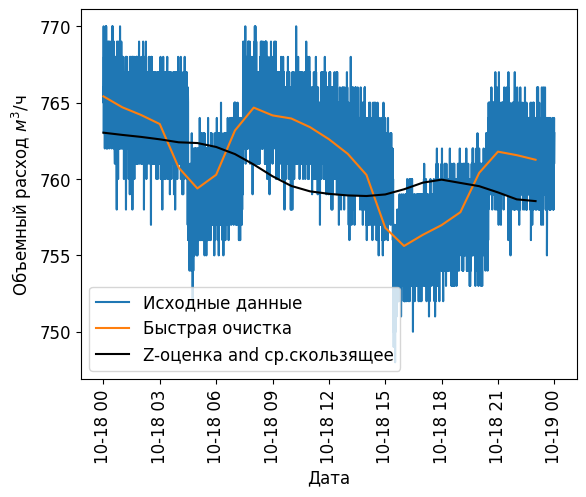

In [133]:
# quick view on sma results
plt.plot(initial_view["Value"], label="Исходные данные")
plt.plot(periods_all["2022-10-17 2022-10-21"].loc["2022-10-18", "Q2"], label="Быстрая очистка")
plt.plot(pdp.period["2022-10-17 2022-10-21"].loc["2022-10-18", "Q2"], label="Z-оценка and ср.скользящее", color="black")
# plt.ylabel("Water Flow Rate $m^3$/h")
plt.ylabel("Объемный расход $м^3$/ч")
plt.xlabel("Дата")
plt.xticks(rotation=90)
plt.legend()
# plt.ylim(640, 740)

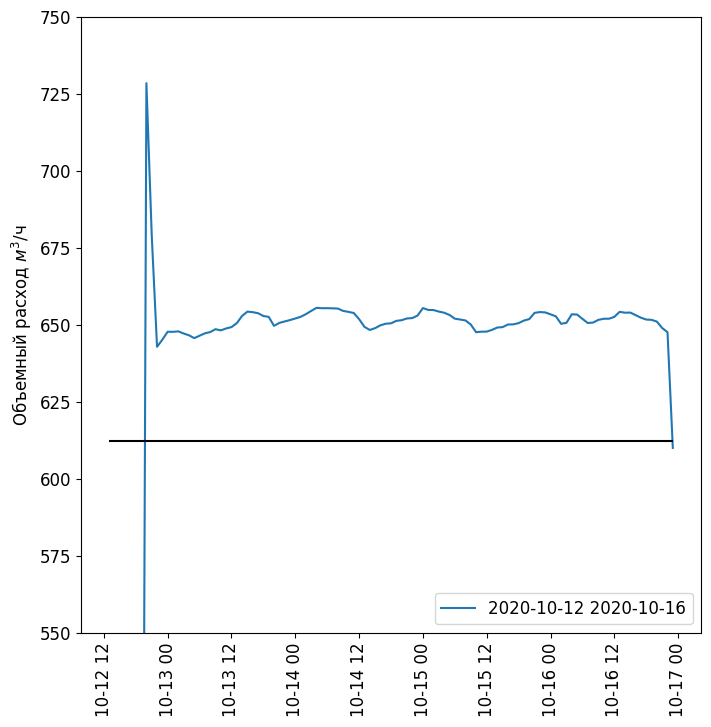

In [134]:
# plot Q2 for some weeks before zscore filtering

plt.figure(figsize=(8,8))
weeks = list(pdp.period_keys)[:1]
for i in weeks:
    plt.plot(periods_all[i]["Q2"], label=i)
    plt.hlines(
        periods_all[i]["Q2"].mean(),
        periods_all[i]["Q2"].index[0],
        periods_all[i]["Q2"].index[-1],
        color="black",
        
)

# plt.ylabel("Water Flow Rate $m^3$/h")
plt.ylabel("Объемный расход $м^3$/ч")
plt.ylim(550, 750)
plt.xticks(rotation=90)
plt.legend(loc='lower right')

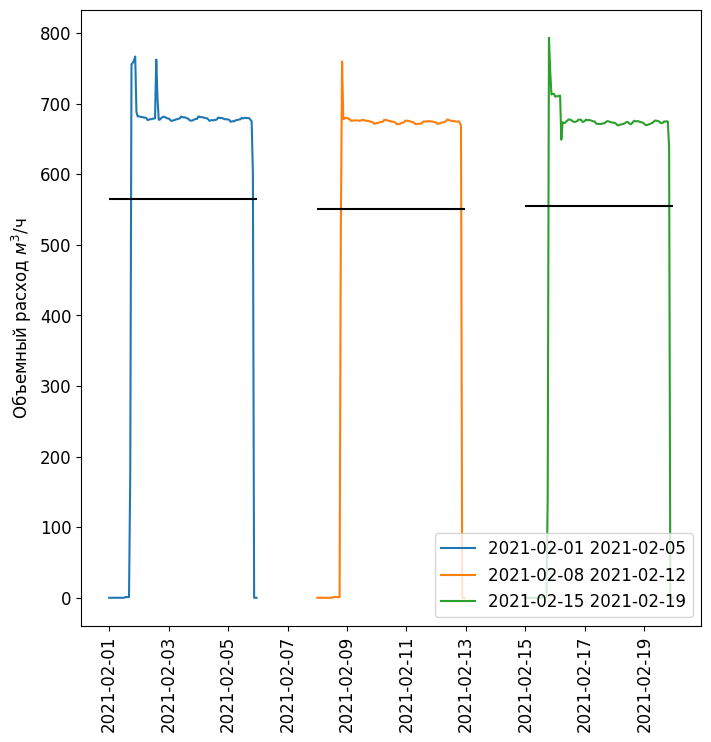

In [135]:
# plot Q2 for some weeks before zscore filtering
plt.figure(figsize=(8,8))
weeks = list(pdp.period_keys)[13:16]
for i in weeks:
    plt.plot(periods_all[i]["Q2"], label=i)
    plt.hlines(
        periods_all[i]["Q2"].mean(),
        periods_all[i]["Q2"].index[0],
        periods_all[i]["Q2"].index[-1],
        color="black",
#         label="среднее"
        
)
# plt.ylim(400, 950)
# plt.ylabel("Water Flow Rate $m^3$/h")
plt.ylabel("Объемный расход $м^3$/ч")
plt.xticks(rotation=90)
plt.legend(loc='lower right')

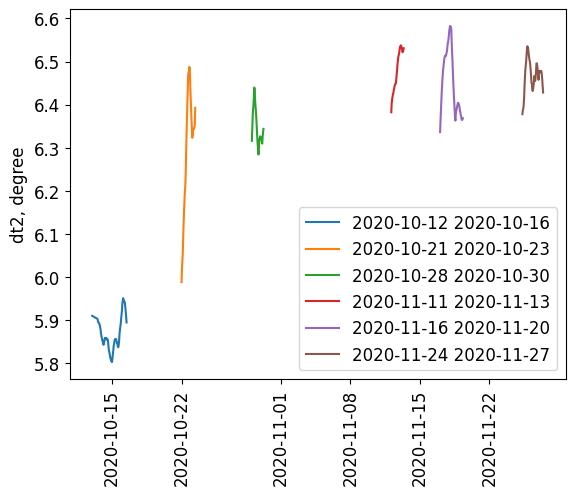

In [136]:
## dt2 has high bias so lets check how Q2 filtering fixed it
# plot dt for some weeks
# is there an urge to filter data one more time but now by dt?
weeks = list(pdp.period_keys)[:6]
for i in weeks:
    plt.plot(
        pdp.period[i]["dt2"], 
        label=i)

plt.ylabel("dt2, degree")
plt.xticks(rotation=90)
plt.legend()

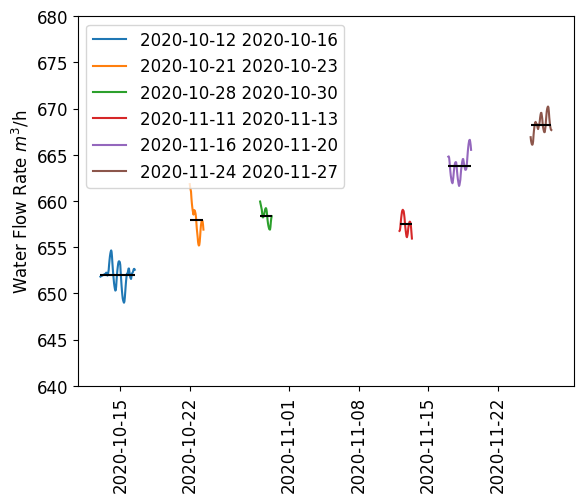

In [137]:
# plot Q2 for some weeks
weeks = list(pdp.period_keys)[:6]
for i in weeks:
    plt.plot(pdp.period[i]["Q2"], label=i)
    plt.hlines(
        pdp.period[i]["Q2"].mean(),
        pdp.period[i]["Q2"].index[0],
        pdp.period[i]["Q2"].index[-1],
        color="black"
        
)
plt.ylim(640,680)
plt.ylabel("Water Flow Rate $m^3$/h")
plt.xticks(rotation=90)
plt.legend()

Text(0.5, 0, 'Объемный расход, $м^3$/ч')

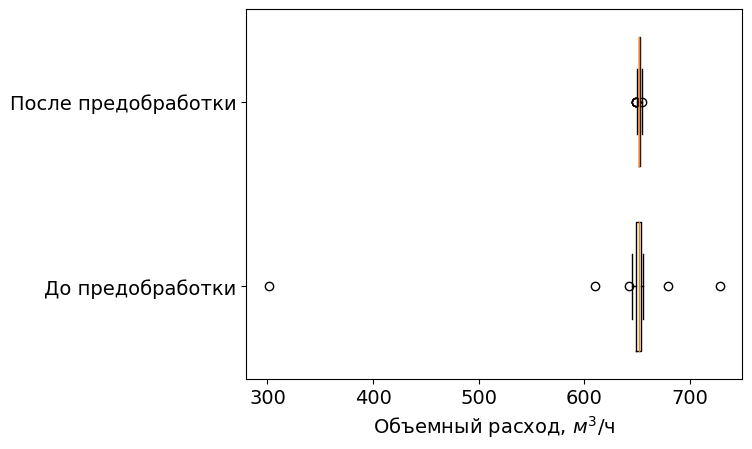

In [138]:
plt.rcParams.update({'font.size': 14})

# before filtering
plt.boxplot(
    labels=["До предобработки", "После предобработки"],
    x = [
        periods_all["2020-10-12 2020-10-16"]["Q2"][periods_all["2020-10-12 2020-10-16"]["Q2"] > 200],
        pdp.period["2020-10-12 2020-10-16"]["Q2"][pdp.period["2020-10-12 2020-10-16"]["Q2"] > 200]
    ],
    vert=False,
    widths=0.7
    
)
plt.xlabel("Объемный расход, $м^3$/ч")
# plt.boxplot(
#     pdp.period["2020-10-12 2020-10-16"]["Q2"][pdp.period["2020-10-12 2020-10-16"]["Q2"] > 200],
#     vert=False,
#     labels=["Water FLow Rate After"]
# )

In [139]:
df = pdp.to_dataframe()
df

CTF1       CTF2      CTF3        P2          Q2  \
Timestamp                                                                   
2020-10-13 00:00:00  10.391642  75.536672  2.366792  0.400037  651.812917   
2020-10-13 13:00:00   1.769823  75.148147  2.332297  0.400000  652.146667   
2020-10-13 14:00:00   1.645218  75.190566  2.289487  0.400000  652.247083   
2020-10-13 15:00:00   1.720101  75.288327  2.248732  0.400000  652.162500   
2020-10-13 16:00:00   1.709977  75.429964  2.264559  0.400000  651.994167   
...                        ...        ...       ...       ...         ...   
2023-04-13 20:00:00  46.293973  79.489833  1.784246  0.479764  652.115417   
2023-04-13 21:00:00  37.239074  79.488435  1.687247  0.479764  652.040000   
2023-04-13 22:00:00  28.394498  79.511639  1.731881  0.479781  652.057500   
2023-04-13 23:00:00  28.241128  79.470599  1.797932  0.479781  652.007083   
2023-04-14 00:00:00  28.260489  79.396319  1.727572  0.479781  651.933750   

                         T1aHE      T1bHE      T2aHE     T2aHE1     T2aHE2  \
Timestamp                                                                    
2020-10-13 00:00:00  41.489093  47.106167  33.441085  33.984650  33.655208   
2020-10-13 13:00:00  41.521119  47.103154  33.504863  34.047193  33.710372   
2020-10-13 14:00:00  41.665119  47.228287  33.671215  34.209205  33.871750   
2020-10-13 15:00:00  41.688156  47.239838  33.707642  34.244415  33.906022   
2020-10-13 16:00:00  41.639971  47.186255  33.663756  34.202676  33.862954   
...                        ...        ...        ...        ...        ...   
2023-04-13 20:00:00  41.822770  48.098035  30.721970  30.608374  30.487190   
2023-04-13 21:00:00  41.489754  47.771044  30.350031  30.243953  30.117627   
2023-04-13 22:00:00  41.371228  47.641331  30.249506  30.146111  30.018694   
2023-04-13 23:00:00  41.256620  47.538801  30.087632  29.982186  29.856776   
2023-04-14 00:00:00  41.009009  47.310767  29.764496  29.658792  29.535645   

                     ...      T2bHE      Tair   Treactor         p21  \
Timestamp            ...                                               
2020-10-13 00:00:00  ...  27.530647  6.704512  46.675417    2.027749   
2020-10-13 13:00:00  ...  27.601600  6.631041  46.800432    2.078860   
2020-10-13 14:00:00  ...  27.773236  6.405955  46.922489    2.047673   
2020-10-13 15:00:00  ...  27.812119  6.144858  46.944957    1.946019   
2020-10-13 16:00:00  ...  27.769766  5.829155  46.902795    1.984860   
...                  ...        ...       ...        ...         ...   
2023-04-13 20:00:00  ...  24.876825  2.164719  42.880856  145.501706   
2023-04-13 21:00:00  ...  24.506555  1.381543  42.547088  145.725531   
2023-04-13 22:00:00  ...  24.422053  0.596239  42.411509  145.945769   
2023-04-13 23:00:00  ...  24.240284 -0.178283  42.301710  145.895007   
2023-04-14 00:00:00  ...  23.888529 -1.052112  42.143435  145.692376   

                            p22         p23        p24       dt1       dt2  \
Timestamp                                                                    
2020-10-13 00:00:00  145.565675   87.493817  94.888844  5.617074  5.910438   
2020-10-13 13:00:00  145.521144   87.509749  94.877725  5.582035  5.903263   
2020-10-13 14:00:00  145.601967   87.545326  94.866934  5.563168  5.897979   
2020-10-13 15:00:00  145.730676   87.543530  94.789916  5.551682  5.895524   
2020-10-13 16:00:00  145.865957   87.565692  94.723563  5.546284  5.893990   
...                         ...         ...        ...       ...       ...   
2023-04-13 20:00:00  140.349103  141.447866   1.721029  6.275265  5.845145   
2023-04-13 21:00:00  140.590839  141.577473   1.765666  6.281291  5.843476   
2023-04-13 22:00:00  140.825005  141.642128   1.740993  6.270103  5.827453   
2023-04-13 23:00:00  140.762517  141.566434   1.797323  6.282181  5.847348   
2023-04-14 00:00:00  140.543962  141.399346   1.735447  6.301757  5.875966   

                     pumps2  
Timestamp                  

In [140]:
fe = FeatureEngineering(df)

In [141]:
fe.df

CTF1       CTF2      CTF3        P2          Q2  \
Timestamp                                                                   
2020-10-13 00:00:00  10.391642  75.536672  2.366792  0.400037  651.812917   
2020-10-13 13:00:00   1.769823  75.148147  2.332297  0.400000  652.146667   
2020-10-13 14:00:00   1.645218  75.190566  2.289487  0.400000  652.247083   
2020-10-13 15:00:00   1.720101  75.288327  2.248732  0.400000  652.162500   
2020-10-13 16:00:00   1.709977  75.429964  2.264559  0.400000  651.994167   
...                        ...        ...       ...       ...         ...   
2023-04-13 20:00:00  46.293973  79.489833  1.784246  0.479764  652.115417   
2023-04-13 21:00:00  37.239074  79.488435  1.687247  0.479764  652.040000   
2023-04-13 22:00:00  28.394498  79.511639  1.731881  0.479781  652.057500   
2023-04-13 23:00:00  28.241128  79.470599  1.797932  0.479781  652.007083   
2023-04-14 00:00:00  28.260489  79.396319  1.727572  0.479781  651.933750   

                         T1aHE      T1bHE      T2aHE     T2aHE1     T2aHE2  \
Timestamp                                                                    
2020-10-13 00:00:00  41.489093  47.106167  33.441085  33.984650  33.655208   
2020-10-13 13:00:00  41.521119  47.103154  33.504863  34.047193  33.710372   
2020-10-13 14:00:00  41.665119  47.228287  33.671215  34.209205  33.871750   
2020-10-13 15:00:00  41.688156  47.239838  33.707642  34.244415  33.906022   
2020-10-13 16:00:00  41.639971  47.186255  33.663756  34.202676  33.862954   
...                        ...        ...        ...        ...        ...   
2023-04-13 20:00:00  41.822770  48.098035  30.721970  30.608374  30.487190   
2023-04-13 21:00:00  41.489754  47.771044  30.350031  30.243953  30.117627   
2023-04-13 22:00:00  41.371228  47.641331  30.249506  30.146111  30.018694   
2023-04-13 23:00:00  41.256620  47.538801  30.087632  29.982186  29.856776   
2023-04-14 00:00:00  41.009009  47.310767  29.764496  29.658792  29.535645   

                     ...   Treactor         p21         p22         p23  \
Timestamp            ...                                                  
2020-10-13 00:00:00  ...  46.675417    2.027749  145.565675   87.493817   
2020-10-13 13:00:00  ...  46.800432    2.078860  145.521144   87.509749   
2020-10-13 14:00:00  ...  46.922489    2.047673  145.601967   87.545326   
2020-10-13 15:00:00  ...  46.944957    1.946019  145.730676   87.543530   
2020-10-13 16:00:00  ...  46.902795    1.984860  145.865957   87.565692   
...                  ...        ...         ...         ...         ...   
2023-04-13 20:00:00  ...  42.880856  145.501706  140.349103  141.447866   
2023-04-13 21:00:00  ...  42.547088  145.725531  140.590839  141.577473   
2023-04-13 22:00:00  ...  42.411509  145.945769  140.825005  141.642128   
2023-04-13 23:00:00  ...  42.301710  145.895007  140.762517  141.566434   
2023-04-14 00:00:00  ...  42.143435  145.692376  140.543962  141.399346   

                           p24       dt1       dt2  pumps2  dt_circuits_coef  \
Timestamp                                                                      
2020-10-13 00:00:00  94.888844  5.617074  5.910438     234          1.711045   
2020-10-13 13:00:00  94.877725  5.582035  5.903263     234          1.706537   
2020-10-13 14:00:00  94.866934  5.563168  5.897979     234          1.700496   
2020-10-13 15:00:00  94.789916  5.551682  5.895524     234          1.698534   
2020-10-13 16:00:00  94.723563  5.546284  5.893990     234          1.699195   
...                        ...       ...       ...     ...               ...   
2023-04-13 20:00:00   1.721029  6.275265  5.845145     123          1.933448   
2023-04-13 21:00:00   1.765666  6.281291  5.843476     123          1.949317   
2023-04-13 22:00:00   1.740993  6.270103  5.827453     123          1.950750   
2023-04-13 23:00:00   1.797323  6.282181  5.847348     123          1.961149   
2023-04-14 00:00:00   1.735447  6.301757  5.875966     123          1.980

In [142]:
# makes new feature from passed columns
# if omitbelow is given excludes column from averaging
fe.columns_averaging(columns=["p21", "p22", "p23", "p24"], omitbelow=50, feature_name="I2mean")


['p21', 'p22', 'p23', 'p24']


CTF1       CTF2      CTF3        P2          Q2  \
Timestamp                                                                   
2020-10-13 00:00:00  10.391642  75.536672  2.366792  0.400037  651.812917   
2020-10-13 13:00:00   1.769823  75.148147  2.332297  0.400000  652.146667   
2020-10-13 14:00:00   1.645218  75.190566  2.289487  0.400000  652.247083   
2020-10-13 15:00:00   1.720101  75.288327  2.248732  0.400000  652.162500   
2020-10-13 16:00:00   1.709977  75.429964  2.264559  0.400000  651.994167   
...                        ...        ...       ...       ...         ...   
2023-04-13 20:00:00  46.293973  79.489833  1.784246  0.479764  652.115417   
2023-04-13 21:00:00  37.239074  79.488435  1.687247  0.479764  652.040000   
2023-04-13 22:00:00  28.394498  79.511639  1.731881  0.479781  652.057500   
2023-04-13 23:00:00  28.241128  79.470599  1.797932  0.479781  652.007083   
2023-04-14 00:00:00  28.260489  79.396319  1.727572  0.479781  651.933750   

                         T1aHE      T1bHE      T2aHE     T2aHE1     T2aHE2  \
Timestamp                                                                    
2020-10-13 00:00:00  41.489093  47.106167  33.441085  33.984650  33.655208   
2020-10-13 13:00:00  41.521119  47.103154  33.504863  34.047193  33.710372   
2020-10-13 14:00:00  41.665119  47.228287  33.671215  34.209205  33.871750   
2020-10-13 15:00:00  41.688156  47.239838  33.707642  34.244415  33.906022   
2020-10-13 16:00:00  41.639971  47.186255  33.663756  34.202676  33.862954   
...                        ...        ...        ...        ...        ...   
2023-04-13 20:00:00  41.822770  48.098035  30.721970  30.608374  30.487190   
2023-04-13 21:00:00  41.489754  47.771044  30.350031  30.243953  30.117627   
2023-04-13 22:00:00  41.371228  47.641331  30.249506  30.146111  30.018694   
2023-04-13 23:00:00  41.256620  47.538801  30.087632  29.982186  29.856776   
2023-04-14 00:00:00  41.009009  47.310767  29.764496  29.658792  29.535645   

                     ...         p21         p22         p23        p24  \
Timestamp            ...                                                  
2020-10-13 00:00:00  ...    2.027749  145.565675   87.493817  94.888844   
2020-10-13 13:00:00  ...    2.078860  145.521144   87.509749  94.877725   
2020-10-13 14:00:00  ...    2.047673  145.601967   87.545326  94.866934   
2020-10-13 15:00:00  ...    1.946019  145.730676   87.543530  94.789916   
2020-10-13 16:00:00  ...    1.984860  145.865957   87.565692  94.723563   
...                  ...         ...         ...         ...        ...   
2023-04-13 20:00:00  ...  145.501706  140.349103  141.447866   1.721029   
2023-04-13 21:00:00  ...  145.725531  140.590839  141.577473   1.765666   
2023-04-13 22:00:00  ...  145.945769  140.825005  141.642128   1.740993   
2023-04-13 23:00:00  ...  145.895007  140.762517  141.566434   1.797323   
2023-04-14 00:00:00  ...  145.692376  140.543962  141.399346   1.735447   

                          dt1       dt2  pumps2  dt_circuits_coef  \
Timestamp                                                           
2020-10-13 00:00:00  5.617074  5.910438     234          1.711045   
2020-10-13 13:00:00  5.582035  5.903263     234          1.706537   
2020-10-13 14:00:00  5.563168  5.897979     234          1.700496   
2020-10-13 15:00:00  5.551682  5.895524     234          1.698534   
2020-10-13 16:00:00  5.546284  5.893990     234          1.699195   
...                       ...       ...     ...               ...   
2023-04-13 20:00:00  6.275265  5.845145     123          1.933448   
2023-04-13 21:00:00  6.281291  5.843476     123          1.949317   
2023-04-13 22:00:00  6.270103  5.827453     123          1.950750   
2023-04-13 23:00:00  6.282181  5.847348     123          1.961149   
2023-04-14 00:00:00  6.301757  5.875966     123          1.980481   

                     dt_circuits_coef_delta      I2mean  
Timestamp                                                
2020-10-13 00:00:00

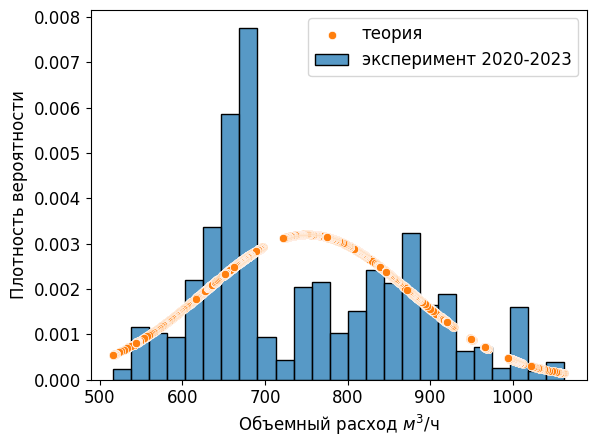

In [143]:
plt.rcParams.update({'font.size': 12})
sns.histplot(df.loc[:, "Q2"], stat="density", label="эксперимент 2020-2023")
mu, sigma = norm.fit(df.loc[:, "Q2"])
nrm = norm(mu, sigma).pdf(df.loc[:, "Q2"])
sns.scatterplot(x=df.loc[:, "Q2"], y=nrm, label="теория")

plt.ylabel("Плотность вероятности")
plt.xlabel("Объемный расход $м^3$/ч")
plt.legend()

ShapiroResult(statistic=0.970400869846344, pvalue=0.005318068899214268)

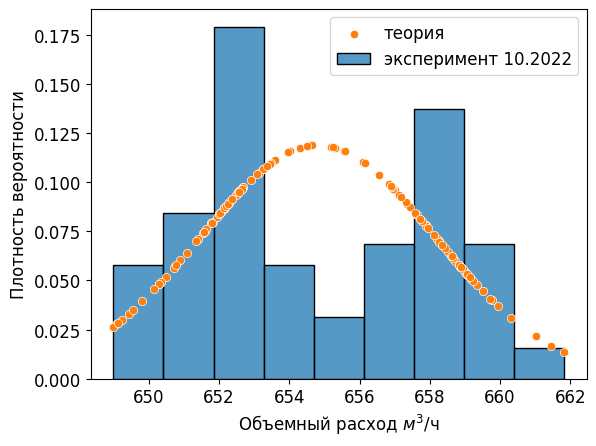

In [144]:
sns.histplot(df.loc["2020-10", "Q2"], stat="density", label="эксперимент 10.2022")
mu, sigma = norm.fit(fe.df.loc["2020-10", "Q2"])
nrm = norm(mu, sigma).pdf(fe.df.loc["2020-10", "Q2"])
sns.scatterplot(x=fe.df.loc["2020-10", "Q2"], y=nrm, label="теория")


plt.ylabel("Плотность вероятности")
plt.xlabel("Объемный расход $м^3$/ч")

scipy.stats.shapiro(nrm)

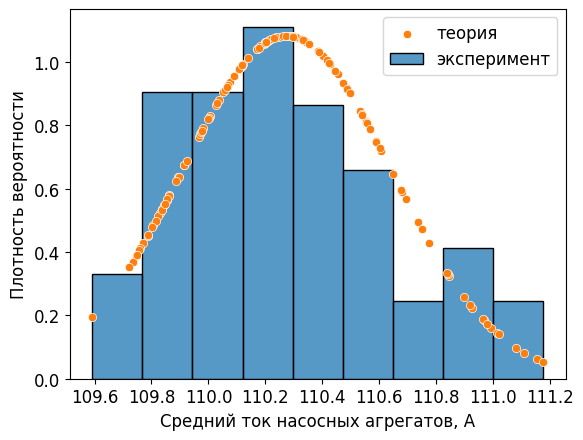

In [145]:
sns.histplot(fe.df.loc["2020-11", "I2mean"], stat="density", label="эксперимент")
mu, sigma = norm.fit(fe.df.loc["2020-11", "I2mean"])
nrm = norm(mu, sigma).pdf(fe.df.loc["2020-11", "I2mean"])
sns.scatterplot(x=fe.df.loc["2020-11", "I2mean"], y=nrm, label="теория")
plt.ylabel("Плотность вероятности")
plt.xlabel("Средний ток насосных агрегатов, А")
plt.legend()

In [146]:
fe.columns_categorizing(
    columns=["CTF1", "CTF2", "CTF3"],
    value=50,
    i=1,
    e=0,
    operator="gt"
)

CTF1  CTF2  CTF3        P2          Q2      T1aHE  \
Timestamp                                                                
2020-10-13 00:00:00     0     1     0  0.400037  651.812917  41.489093   
2020-10-13 13:00:00     0     1     0  0.400000  652.146667  41.521119   
2020-10-13 14:00:00     0     1     0  0.400000  652.247083  41.665119   
2020-10-13 15:00:00     0     1     0  0.400000  652.162500  41.688156   
2020-10-13 16:00:00     0     1     0  0.400000  651.994167  41.639971   
...                   ...   ...   ...       ...         ...        ...   
2023-04-13 20:00:00     0     1     0  0.479764  652.115417  41.822770   
2023-04-13 21:00:00     0     1     0  0.479764  652.040000  41.489754   
2023-04-13 22:00:00     0     1     0  0.479781  652.057500  41.371228   
2023-04-13 23:00:00     0     1     0  0.479781  652.007083  41.256620   
2023-04-14 00:00:00     0     1     0  0.479781  651.933750  41.009009   

                         T1bHE      T2aHE     T2aHE1     T2aHE2  ...  \
Timestamp                                                        ...   
2020-10-13 00:00:00  47.106167  33.441085  33.984650  33.655208  ...   
2020-10-13 13:00:00  47.103154  33.504863  34.047193  33.710372  ...   
2020-10-13 14:00:00  47.228287  33.671215  34.209205  33.871750  ...   
2020-10-13 15:00:00  47.239838  33.707642  34.244415  33.906022  ...   
2020-10-13 16:00:00  47.186255  33.663756  34.202676  33.862954  ...   
...                        ...        ...        ...        ...  ...   
2023-04-13 20:00:00  48.098035  30.721970  30.608374  30.487190  ...   
2023-04-13 21:00:00  47.771044  30.350031  30.243953  30.117627  ...   
2023-04-13 22:00:00  47.641331  30.249506  30.146111  30.018694  ...   
2023-04-13 23:00:00  47.538801  30.087632  29.982186  29.856776  ...   
2023-04-14 00:00:00  47.310767  29.764496  29.658792  29.535645  ...   

                            p21         p22         p23        p24       dt1  \
Timestamp                                                                      
2020-10-13 00:00:00    2.027749  145.565675   87.493817  94.888844  5.617074   
2020-10-13 13:00:00    2.078860  145.521144   87.509749  94.877725  5.582035   
2020-10-13 14:00:00    2.047673  145.601967   87.545326  94.866934  5.563168   
2020-10-13 15:00:00    1.946019  145.730676   87.543530  94.789916  5.551682   
2020-10-13 16:00:00    1.984860  145.865957   87.565692  94.723563  5.546284   
...                         ...         ...         ...        ...       ...   
2023-04-13 20:00:00  145.501706  140.349103  141.447866   1.721029  6.275265   
2023-04-13 21:00:00  145.725531  140.590839  141.577473   1.765666  6.281291   
2023-04-13 22:00:00  145.945769  140.825005  141.642128   1.740993  6.270103   
2023-04-13 23:00:00  145.895007  140.762517  141.566434   1.797323  6.282181   
2023-04-14 00:00:00  145.692376  140.543962  141.399346   1.735447  6.301757   

                          dt2  pumps2  dt_circuits_coef  \
Timestamp                                                 
2020-10-13 00:00:00  5.910438     234          1.711045   
2020-10-13 13:00:00  5.903263     234          1.706537   
2020-10-13 14:00:00  5.897979     234          1.700496   
2020-10-13 15:00:00  5.895524     234          1.698534   
2020-10-13 16:00:00  5.893990     234          1.699195   
...                       ...     ...               ...   
2023-04-13 20:00:00  5.845145     123          1.933448   
2023-04-13 21:00:00  5.843476     123          1.949317   
2023-04-13 22:00:00  5.827453     123          1.950750   
2023-04-13 23:00:00  5.847348     123          1.961149   
2023-04-14 00:00:00  5.875966     123          1.980481   

                     dt_circuits_coef_delta      I2mean  
Timestamp                                                
2020-10-13 00:00:00               19.575520  109.316112  
2020-10-13 13:00:00               19.501554  109.302873  
2020-10-13 14:00:00               19.455052  109.338076  
2020-10-13 15:00:00   

In [147]:
fe.make_QbyIP()

CTF1  CTF2  CTF3        P2          Q2      T1aHE  \
Timestamp                                                                
2020-10-13 00:00:00     0     1     0  0.400037  651.812917  41.489093   
2020-10-13 13:00:00     0     1     0  0.400000  652.146667  41.521119   
2020-10-13 14:00:00     0     1     0  0.400000  652.247083  41.665119   
2020-10-13 15:00:00     0     1     0  0.400000  652.162500  41.688156   
2020-10-13 16:00:00     0     1     0  0.400000  651.994167  41.639971   
...                   ...   ...   ...       ...         ...        ...   
2023-04-13 20:00:00     0     1     0  0.479764  652.115417  41.822770   
2023-04-13 21:00:00     0     1     0  0.479764  652.040000  41.489754   
2023-04-13 22:00:00     0     1     0  0.479781  652.057500  41.371228   
2023-04-13 23:00:00     0     1     0  0.479781  652.007083  41.256620   
2023-04-14 00:00:00     0     1     0  0.479781  651.933750  41.009009   

                         T1bHE      T2aHE     T2aHE1     T2aHE2  ...  \
Timestamp                                                        ...   
2020-10-13 00:00:00  47.106167  33.441085  33.984650  33.655208  ...   
2020-10-13 13:00:00  47.103154  33.504863  34.047193  33.710372  ...   
2020-10-13 14:00:00  47.228287  33.671215  34.209205  33.871750  ...   
2020-10-13 15:00:00  47.239838  33.707642  34.244415  33.906022  ...   
2020-10-13 16:00:00  47.186255  33.663756  34.202676  33.862954  ...   
...                        ...        ...        ...        ...  ...   
2023-04-13 20:00:00  48.098035  30.721970  30.608374  30.487190  ...   
2023-04-13 21:00:00  47.771044  30.350031  30.243953  30.117627  ...   
2023-04-13 22:00:00  47.641331  30.249506  30.146111  30.018694  ...   
2023-04-13 23:00:00  47.538801  30.087632  29.982186  29.856776  ...   
2023-04-14 00:00:00  47.310767  29.764496  29.658792  29.535645  ...   

                            p22         p23        p24       dt1       dt2  \
Timestamp                                                                    
2020-10-13 00:00:00  145.565675   87.493817  94.888844  5.617074  5.910438   
2020-10-13 13:00:00  145.521144   87.509749  94.877725  5.582035  5.903263   
2020-10-13 14:00:00  145.601967   87.545326  94.866934  5.563168  5.897979   
2020-10-13 15:00:00  145.730676   87.543530  94.789916  5.551682  5.895524   
2020-10-13 16:00:00  145.865957   87.565692  94.723563  5.546284  5.893990   
...                         ...         ...        ...       ...       ...   
2023-04-13 20:00:00  140.349103  141.447866   1.721029  6.275265  5.845145   
2023-04-13 21:00:00  140.590839  141.577473   1.765666  6.281291  5.843476   
2023-04-13 22:00:00  140.825005  141.642128   1.740993  6.270103  5.827453   
2023-04-13 23:00:00  140.762517  141.566434   1.797323  6.282181  5.847348   
2023-04-14 00:00:00  140.543962  141.399346   1.735447  6.301757  5.875966   

                     pumps2  dt_circuits_coef  dt_circuits_coef_delta  \
Timestamp                                                               
2020-10-13 00:00:00     234          1.711045               19.575520   
2020-10-13 13:00:00     234          1.706537               19.501554   
2020-10-13 14:00:00     234          1.700496               19.455052   
2020-10-13 15:00:00     234          1.698534               19.427719   
2020-10-13 16:00:00     234          1.699195               19.416490   
...                     ...               ...                     ...   
2023-04-13 20:00:00     123          1.933448               23.221211   
2023-04-13 21:00:00     123          1.949317               23.264490   
2023-04-13 22:00:00     123          1.950750               23.219278   
2023-04-13 23:00:00     123          1.961149               23.298517   
2023-04-14 00:00:00     123          1.980481               23.422237   

                         I2mean      QbyIP  
Timestamp                                   
2020-10-13 00:00:00  109.316112  14.905212  
2020-10-13 13:00:00  

In [148]:
fe.make_dts_on_HEs()

CTF1  CTF2  CTF3        P2          Q2      T1aHE  \
Timestamp                                                                
2020-10-13 00:00:00     0     1     0  0.400037  651.812917  41.489093   
2020-10-13 13:00:00     0     1     0  0.400000  652.146667  41.521119   
2020-10-13 14:00:00     0     1     0  0.400000  652.247083  41.665119   
2020-10-13 15:00:00     0     1     0  0.400000  652.162500  41.688156   
2020-10-13 16:00:00     0     1     0  0.400000  651.994167  41.639971   
...                   ...   ...   ...       ...         ...        ...   
2023-04-13 20:00:00     0     1     0  0.479764  652.115417  41.822770   
2023-04-13 21:00:00     0     1     0  0.479764  652.040000  41.489754   
2023-04-13 22:00:00     0     1     0  0.479781  652.057500  41.371228   
2023-04-13 23:00:00     0     1     0  0.479781  652.007083  41.256620   
2023-04-14 00:00:00     0     1     0  0.479781  651.933750  41.009009   

                         T1bHE      T2aHE    T2aHE1    T2aHE2  ...  \
Timestamp                                                      ...   
2020-10-13 00:00:00  47.106167  33.441085  0.329698  0.312868  ...   
2020-10-13 13:00:00  47.103154  33.504863  0.330517  0.313245  ...   
2020-10-13 14:00:00  47.228287  33.671215  0.330812  0.313467  ...   
2020-10-13 15:00:00  47.239838  33.707642  0.331089  0.313671  ...   
2020-10-13 16:00:00  47.186255  33.663756  0.331312  0.313815  ...   
...                        ...        ...       ...       ...  ...   
2023-04-13 20:00:00  48.098035  30.721970  0.246824  0.241605  ...   
2023-04-13 21:00:00  47.771044  30.350031  0.246616  0.241186  ...   
2023-04-13 22:00:00  47.641331  30.249506  0.246522  0.241034  ...   
2023-04-13 23:00:00  47.538801  30.087632  0.246449  0.241066  ...   
2023-04-14 00:00:00  47.310767  29.764496  0.246358  0.241101  ...   

                            p22         p23        p24       dt1       dt2  \
Timestamp                                                                    
2020-10-13 00:00:00  145.565675   87.493817  94.888844  5.617074  5.910438   
2020-10-13 13:00:00  145.521144   87.509749  94.877725  5.582035  5.903263   
2020-10-13 14:00:00  145.601967   87.545326  94.866934  5.563168  5.897979   
2020-10-13 15:00:00  145.730676   87.543530  94.789916  5.551682  5.895524   
2020-10-13 16:00:00  145.865957   87.565692  94.723563  5.546284  5.893990   
...                         ...         ...        ...       ...       ...   
2023-04-13 20:00:00  140.349103  141.447866   1.721029  6.275265  5.845145   
2023-04-13 21:00:00  140.590839  141.577473   1.765666  6.281291  5.843476   
2023-04-13 22:00:00  140.825005  141.642128   1.740993  6.270103  5.827453   
2023-04-13 23:00:00  140.762517  141.566434   1.797323  6.282181  5.847348   
2023-04-14 00:00:00  140.543962  141.399346   1.735447  6.301757  5.875966   

                     pumps2  dt_circuits_coef  dt_circuits_coef_delta  \
Timestamp                                                               
2020-10-13 00:00:00     234          1.711045               19.575520   
2020-10-13 13:00:00     234          1.706537               19.501554   
2020-10-13 14:00:00     234          1.700496               19.455052   
2020-10-13 15:00:00     234          1.698534               19.427719   
2020-10-13 16:00:00     234          1.699195               19.416490   
...                     ...               ...                     ...   
2023-04-13 20:00:00     123          1.933448               23.221211   
2023-04-13 21:00:00     123          1.949317               23.264490   
2023-04-13 22:00:00     123          1.950750               23.219278   
2023-04-13 23:00:00     123          1.961149               23.298517   
2023-04-14 00:00:00     123          1.980481               23.422237   

                         I2mean      QbyIP  
Timestamp                                   
2020-10-13 00:00:00  109.316112  14.905212  
2020-10-13 13:00:00  109.302873  14.916046  
20

# The data above are in range of 14.10.2020-14.04.2023
## Annually few or all HE's were under fouling remove services to increase cooling system efficiency
## Reactor onpower dates are
### [ (2019-08-22, 2020-06-29), (2020-10-12, 2021-07-02), (2021-09-06, 2022-07-01), (2022-09-05, 2023-04-14) ]
## The dates of HE's onpower cycles are
### HE1 [ ( 2019-08-22, 2021-07-02 ), ( 2021-09-06, 2022-07-01 ), ( 2022-09-05, 2023-04-14 ) ]
### HE2 [ ( 2019-08-22, 2021-07-02 ), ( 2021-09-06, 2022-07-01 ), ( 2022-09-05, 2023-04-14 ) ]
### HE3 [ ( 2020-10-12, 2021-06-01 ), ( 2022-03-14, 2023-04-14 ) ]
### HE4 [ ( 2019-10-14, 2021-06-01 ), ( 2021-06-21, 2022-03-14 ), (2022-09-05, 2023-04-14) ]
### HE5 [ ( 2020-06-08, 2021-07-02 ), ( 2021-09-06, 2022-07-01 ) ]

In [149]:

he1 = [("2019-08-22", "2021-07-02"), ("2021-09-06", "2022-07-01"), ("2022-09-05", "2023-04-14")]
he2 = [("2019-08-22", "2021-07-02"), ("2021-09-06", "2022-07-01"), ("2022-09-05", "2023-04-14")]
he3 = [("2020-10-12", "2021-06-01"), ("2022-03-14", "2023-04-14")]
he4 = [("2019-10-14", "2021-06-01"), ("2021-06-21", "2022-03-14" ), ("2022-09-05", "2023-04-14")]
he5 = [("2020-06-08", "2021-07-02"), ("2021-09-06", "2022-07-01")]

# there is a bug when start argument is higher than 1000
fe.make_time_onpower_feature(time_periods=he1, feature_name="HE1_TOP")
fe.df.loc["2019-08-22": "2021-07-02", "HE1_TOP"] = fe.df.loc["2019-08-22": "2021-07-02", "HE1_TOP"]+ 2915

fe.make_time_onpower_feature(time_periods=he2, feature_name="HE2_TOP")
fe.df.loc["2019-08-22": "2021-07-02", "HE2_TOP"] = fe.df.loc["2019-08-22": "2021-07-02", "HE2_TOP"]+ 2915

fe.make_time_onpower_feature(time_periods=he3, feature_name="HE3_TOP")


fe.make_time_onpower_feature(time_periods=he4, feature_name="HE4_TOP")

fe.make_time_onpower_feature(time_periods=he5, feature_name="HE5_TOP")


[8.58947368e+00 1.71789474e+01 2.57684211e+01 ... 1.63028211e+04
 1.63114105e+04 1.63200000e+04] 1900 1900
[3.32342007e+00 6.64684015e+00 9.97026022e+00 ... 7.14535316e+03
 7.14867658e+03 7.15200000e+03] 2152 2152
[4.17309205e+00 8.34618411e+00 1.25192762e+01 ... 5.29565382e+03
 5.29982691e+03 5.30400000e+03] 1271 1271
[8.58947368e+00 1.71789474e+01 2.57684211e+01 ... 1.63028211e+04
 1.63114105e+04 1.63200000e+04] 1900 1900
[3.32342007e+00 6.64684015e+00 9.97026022e+00 ... 7.14535316e+03
 7.14867658e+03 7.15200000e+03] 2152 2152
[4.17309205e+00 8.34618411e+00 1.25192762e+01 ... 5.29565382e+03
 5.29982691e+03 5.30400000e+03] 1271 1271
[3.31428571e+00 6.62857143e+00 9.94285714e+00 ... 5.56137143e+03
 5.56468571e+03 5.56800000e+03] 1680 1680
[4.55390513e+00 9.10781025e+00 1.36617154e+01 ... 9.49489219e+03
 9.49944609e+03 9.50400000e+03] 2087 2087
[8.51428571e+00 1.70285714e+01 2.55428571e+01 ... 1.42869714e+04
 1.42954857e+04 1.43040000e+04] 1680 1680
[4.27309237e+00 8.54618474e+00 1.2819

CTF1  CTF2  CTF3        P2          Q2      T1aHE  \
Timestamp                                                                
2020-10-13 00:00:00     0     1     0  0.400037  651.812917  41.489093   
2020-10-13 13:00:00     0     1     0  0.400000  652.146667  41.521119   
2020-10-13 14:00:00     0     1     0  0.400000  652.247083  41.665119   
2020-10-13 15:00:00     0     1     0  0.400000  652.162500  41.688156   
2020-10-13 16:00:00     0     1     0  0.400000  651.994167  41.639971   
...                   ...   ...   ...       ...         ...        ...   
2023-04-13 20:00:00     0     1     0  0.479764  652.115417  41.822770   
2023-04-13 21:00:00     0     1     0  0.479764  652.040000  41.489754   
2023-04-13 22:00:00     0     1     0  0.479781  652.057500  41.371228   
2023-04-13 23:00:00     0     1     0  0.479781  652.007083  41.256620   
2023-04-14 00:00:00     0     1     0  0.479781  651.933750  41.009009   

                         T1bHE      T2aHE    T2aHE1    T2aHE2  ...  pumps2  \
Timestamp                                                      ...           
2020-10-13 00:00:00  47.106167  33.441085  0.329698  0.312868  ...     234   
2020-10-13 13:00:00  47.103154  33.504863  0.330517  0.313245  ...     234   
2020-10-13 14:00:00  47.228287  33.671215  0.330812  0.313467  ...     234   
2020-10-13 15:00:00  47.239838  33.707642  0.331089  0.313671  ...     234   
2020-10-13 16:00:00  47.186255  33.663756  0.331312  0.313815  ...     234   
...                        ...        ...       ...       ...  ...     ...   
2023-04-13 20:00:00  48.098035  30.721970  0.246824  0.241605  ...     123   
2023-04-13 21:00:00  47.771044  30.350031  0.246616  0.241186  ...     123   
2023-04-13 22:00:00  47.641331  30.249506  0.246522  0.241034  ...     123   
2023-04-13 23:00:00  47.538801  30.087632  0.246449  0.241066  ...     123   
2023-04-14 00:00:00  47.310767  29.764496  0.246358  0.241101  ...     123   

                     dt_circuits_coef  dt_circuits_coef_delta      I2mean  \
Timestamp                                                                   
2020-10-13 00:00:00          1.711045               19.575520  109.316112   
2020-10-13 13:00:00          1.706537               19.501554  109.302873   
2020-10-13 14:00:00          1.700496               19.455052  109.338076   
2020-10-13 15:00:00          1.698534               19.427719  109.354707   
2020-10-13 16:00:00          1.699195               19.416490  109.385071   
...                               ...                     ...         ...   
2023-04-13 20:00:00          1.933448               23.221211  142.432891   
2023-04-13 21:00:00          1.949317               23.264490  142.631281   
2023-04-13 22:00:00          1.950750               23.219278  142.804301   
2023-04-13 23:00:00          1.961149               23.298517  142.741319   
2023-04-14 00:00:00          1.980481               23.422237  142.545228   

                         QbyIP      HE1_TOP      HE2_TOP      HE3_TOP  \
Timestamp                                                               
2020-10-13 00:00:00  14.905212  2923.589474  2923.589474     3.314286   
2020-10-13 13:00:00  14.916046  2932.178947  2932.178947     6.628571   
2020-10-13 14:00:00  14.913539  2940.768421  2940.768421     9.942857   
2020-10-13 15:00:00  14.909337  2949.357895  2949.357895    13.257143   
2020-10-13 16:00:00  14.901352  2957.947368  2957.947368    16.571429   
...                        ...          ...          ...          ...   
2023-04-13 20:00:00   9.543027  5287.307632  5287.307632  9485.784379   
2023-04-13 21:00:00   9.528651  5291.480724  5291.480724  9490.338285   
2023-04-13 22:00:00   9.517031  5295.653816  5295.653816  9494.892190   
2023-04-13 23:00:00   9.520494  5299.826908  5299.826908  9499.446095   
2023-04-14 00:00:00   9.532519  5304.000000  5304.000000  9504.000000   

                         HE4_TOP    HE5_TOP  
Timestamp                                    

In [150]:
# Important step must be added to package/module

fe.df["HE1_status"] = np.zeros(len(fe.df))
fe.df["HE2_status"] = np.zeros(len(fe.df))
fe.df["HE3_status"] = np.zeros(len(fe.df))
fe.df["HE4_status"] = np.zeros(len(fe.df))
fe.df["HE5_status"] = np.zeros(len(fe.df))

fe.df.loc[:, "HE1_status"][fe.df.loc[:, "HE1_TOP"] != 0] = 1
fe.df.loc[:, "T2aHE1"][fe.df.loc[:, "HE1_TOP"] == 0] = 0

fe.df.loc[:, "HE2_status"][fe.df.loc[:, "HE2_TOP"] != 0] = 1
fe.df.loc[:, "T2aHE2"][fe.df.loc[:, "HE2_TOP"] == 0] = 0

fe.df.loc[:, "HE3_status"][fe.df.loc[:, "HE3_TOP"] != 0] = 1
fe.df.loc[:, "T2aHE3"][fe.df.loc[:, "HE3_TOP"] == 0] = 0

fe.df.loc[:, "HE4_status"][fe.df.loc[:, "HE4_TOP"] != 0] = 1
fe.df.loc[:, "T2aHE4"][fe.df.loc[:, "HE4_TOP"] == 0] = 0

fe.df.loc[:, "HE5_status"][fe.df.loc[:, "HE5_TOP"] != 0] = 1
fe.df.loc[:, "T2aHE5"][fe.df.loc[:, "HE5_TOP"] == 0] = 0


/tmp/ipykernel_4097/2441187994.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fe.df.loc[:, "HE1_status"][fe.df.loc[:, "HE1_TOP"] != 0] = 1
/tmp/ipykernel_4097/2441187994.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fe.df.loc[:, "T2aHE1"][fe.df.loc[:, "HE1_TOP"] == 0] = 0
/tmp/ipykernel_4097/2441187994.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fe.df.loc[:, "HE2_status"][fe.df.loc[:, "HE2_TOP"] != 0] = 1
/tmp/ipyk

In [151]:
fe.df["HE_TOP_mean"] = fe.df.loc[:, 
                                 ["HE1_TOP", "HE2_TOP", "HE3_TOP", "HE4_TOP", "HE5_TOP"]
                                ].mean(axis=1)

In [152]:
fe.df["CTF_sum"] = fe.df.loc[:, 
                                 ["CTF1", "CTF2", "CTF3"]
                                ].sum(axis=1)

In [153]:
# final cleaning incase some rows consist of nan
fe.df = fe.df.dropna(axis=0)

<AxesSubplot: xlabel='Timestamp', ylabel='HE_TOP_mean'>

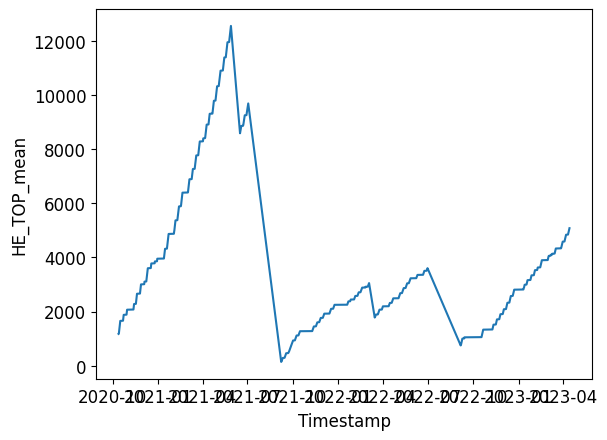

In [154]:
sns.lineplot(fe.df["HE_TOP_mean"])

<AxesSubplot: >

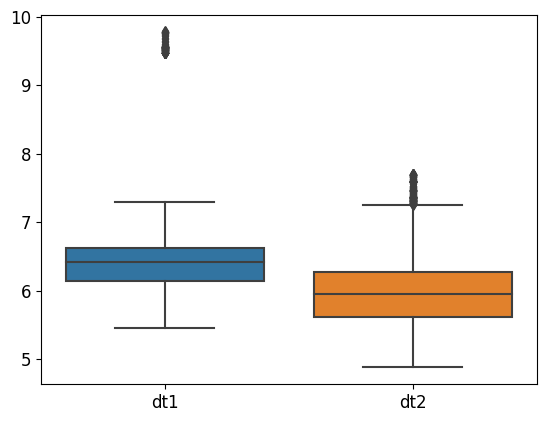

In [155]:
sns.boxplot(fe.df.loc[:, ["dt1", "dt2"]])

In [156]:
fe.df = fe.df[fe.df["P2"] >= 0.3] 

In [157]:
fe.df.to_excel("!important_input_files/rdy_for_stats_121020_210423_1h_freq.xlsx")